In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [2]:

start = '2009-12-31'
end = '2023-05-01'

df= yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.405577,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3354 entries, 2009-12-31 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3354 non-null   float64
 1   High       3354 non-null   float64
 2   Low        3354 non-null   float64
 3   Close      3354 non-null   float64
 4   Adj Close  3354 non-null   float64
 5   Volume     3354 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 183.4 KB


In [4]:
print(df.iloc[0])

Open         7.611786e+00
High         7.619643e+00
Low          7.520000e+00
Close        7.526071e+00
Adj Close    6.405577e+00
Volume       3.524108e+08
Name: 2009-12-31 00:00:00, dtype: float64


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,165.000000,165.600006,163.889999,165.330002,165.330002,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.770004,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.759995,45498800
2023-04-27,165.190002,168.559998,165.190002,168.410004,168.410004,64902300
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.679993,55209200


In [6]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.405577,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200


In [7]:
df=df.drop(['Adj Close'], axis=1)
df.head()


,Date,Open,High,Low,Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200


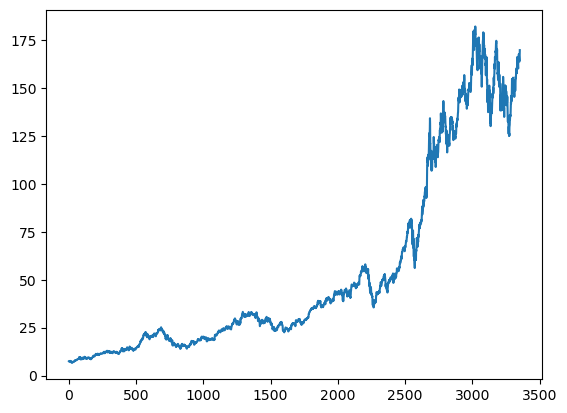

In [8]:
plt.plot(df.Close)

In [9]:
df

,Date,Open,High,Low,Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
...,...,...,...,...,...,...
3349,2023-04-24,165.000000,165.600006,163.889999,165.330002,41949600
3350,2023-04-25,165.190002,166.309998,163.729996,163.770004,48714100
3351,2023-04-26,163.059998,165.279999,162.800003,163.759995,45498800
3352,2023-04-27,165.190002,168.559998,165.190002,168.410004,64902300


In [10]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3349    148.0303
3350    148.2563
3351    148.4136
3352    148.6146
3353    148.8333
Name: Close, Length: 3354, dtype: float64

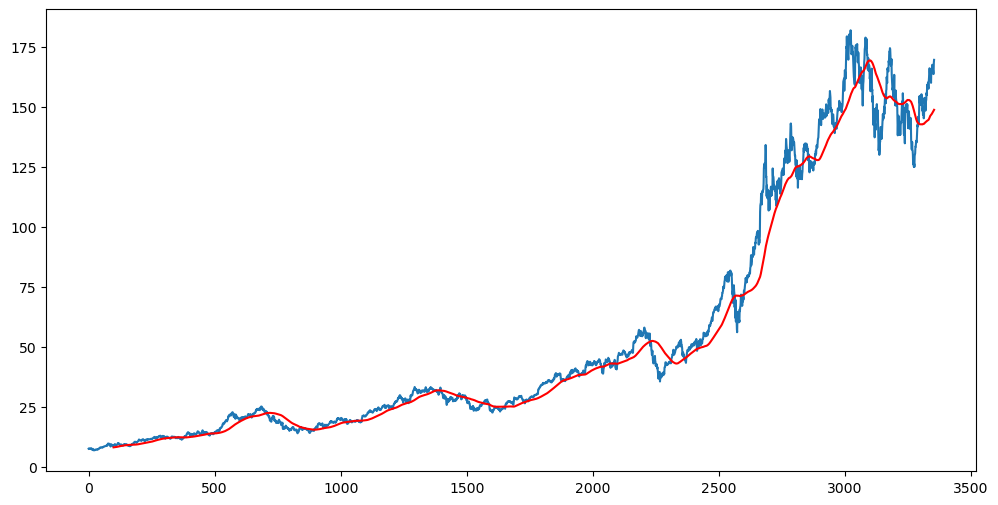

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3349    150.48445
3350    150.56810
3351    150.66255
3352    150.77530
3353    150.89625
Name: Close, Length: 3354, dtype: float64

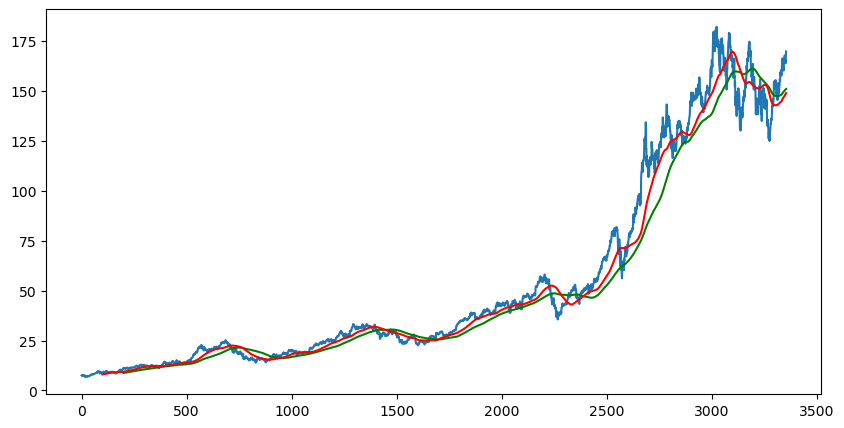

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [14]:
df.shape

(3354, 6)

In [15]:
#splitting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2347, 1)
(1007, 1)


In [16]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [17]:
data_testing.head()

,Close
2347,52.630001
2348,52.287498
2349,52.937500
2350,52.119999
2351,50.715000


In [18]:
scaler= MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.86429447],
       [0.86580936],
       [0.84655549]])

In [20]:
data_training_array.shape

(2347, 1)

In [21]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train),np.array(y_train)

In [22]:
x_train.shape

(2247, 100, 1)

In [23]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
71/71 [==============================] - 41s 431ms/step - loss: 0.0313
Epoch 2/50
71/71 [==============================] - 30s 423ms/step - loss: 0.0061
Epoch 3/50
71/71 [==============================] - 30s 421ms/step - loss: 0.0057
Epoch 4/50
71/71 [==============================] - 30s 422ms/step - loss: 0.0061
Epoch 5/50
71/71 [==============================] - 30s 427ms/step - loss: 0.0052
Epoch 6/50
71/71 [==============================] - 32s 445ms/step - loss: 0.0050
Epoch 7/50
71/71 [==============================] - 32s 445ms/step - loss: 0.0046
Epoch 8/50
71/71 [==============================] - 31s 443ms/step - loss: 0.0052
Epoch 9/50
71/71 [==============================] - 33s 465ms/step - loss: 0.0041
Epoch 10/50
71/71 [==============================] - 32s 455ms/step - loss: 0.0038
Epoch 11/50
71/71 [==============================] - 32s 454ms/step - loss: 0.0036
Epoch 12/50
71/71 [==============================] - 32s 451ms/step - loss: 0.0035
Epoch 13/50
7

In [ ]:
model.save('keras_modeals.h5')

In [ ]:
data_testing.head()

In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df=past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test= []
y_test= []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1.0/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
start_date = '2014-01-01'
end_date = '2023-01-01'
date_range = pd.date_range(start=start_date, end=end_date, periods=len(y_test))
plt.figure(figsize=(12,6))
plt.plot(date_range, y_test,'b',label='Orignal price')
plt.plot(date_range, y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
print(y_predicted)

In [ ]:

# Calculate MSE
mse = mean_squared_error(y_test, y_predicted)
print('MSE:', mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)